In [86]:
from pathlib import Path
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt

input_file = Path("/output/metadata.csv")
df = pd.read_csv(input_file)

In [87]:
df.head()

,x_1,y_1,width_1,height_1,filepath_1,subject_name_1,x_2,y_2,width_2,height_2,filepath_2,subject_name_2,label,gender_1,gender_2,skin_tone_1,skin_tone_2
0,152,147,124,124,/dataset/YouTubeFaces/frame_images_DB/Sadie_Fr...,Sadie_Frost,159,50,53,53,/dataset/YouTubeFaces/frame_images_DB/Sadie_Fr...,Sadie_Frost,1,F,F,#6F503C,#BEA07E
1,174,89,56,56,/dataset/YouTubeFaces/frame_images_DB/Saied_Ha...,Saied_Hadi_al_Mudarissi,174,86,54,54,/dataset/YouTubeFaces/frame_images_DB/Saied_Ha...,Saied_Hadi_al_Mudarissi,1,M,M,#81654F,#81654F
2,246,152,120,120,/dataset/YouTubeFaces/frame_images_DB/Lucio_St...,Lucio_Stanca,187,97,63,63,/dataset/YouTubeFaces/frame_images_DB/Lucio_St...,Lucio_Stanca,1,M,M,#81654F,#81654F
3,228,93,115,115,/dataset/YouTubeFaces/frame_images_DB/Mary_Car...,Mary_Carey,160,137,153,153,/dataset/YouTubeFaces/frame_images_DB/Mary_Car...,Mary_Carey,1,F,F,#9D7A54,#9D7A54
4,242,140,112,112,/dataset/YouTubeFaces/frame_images_DB/Liu_Ye/0...,Liu_Ye,142,97,106,106,/dataset/YouTubeFaces/frame_images_DB/Liu_Ye/5...,Liu_Ye,1,M,M,#81654F,#6F503C


# Data Overview

In [88]:
print(f"Columns labels : {list(df.columns)}")
print(f"Nb triplets : {len(df)}")

Columns labels : ['x_1', 'y_1', 'width_1', 'height_1', 'filepath_1', 'subject_name_1', 'x_2', 'y_2', 'width_2', 'height_2', 'filepath_2', 'subject_name_2', 'label', 'gender_1', 'gender_2', 'skin_tone_1', 'skin_tone_2']
Nb triplets : 5000


In [89]:
def print_images_horizontally(images):
    # Compute the width and height of the combined image
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    # Create a new image, defined as the sequence of original images
    new_im = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]
        
    new_im.show()

def crop_image(img:Image, x:int, y:int, width:int, height:int):
    left = x - width
    upper = y - height
    right = x + width
    lower = y + height
    
    return img.crop((left, upper, right, lower))
    
def print_example(example):
    print(example)

    # Open original images
    orig_img_1 = Image.open(example["filepath_1"], 'r')
    orig_img_2 = Image.open(example["filepath_2"], 'r')

    # Print them side by side
    print_images_horizontally([orig_img_1, orig_img_2])

    # Crop the images (the coordinates in the metadata correspond to the center of the face, hence the custom function)
    cropped_img_1 = crop_image(orig_img_1, example["x_1"], example["y_1"], example["width_1"], example["height_1"])
    cropped_img_2 = crop_image(orig_img_2, example["x_2"], example["y_2"], example["width_2"], example["height_2"])
    print_images_horizontally([cropped_img_1, cropped_img_2])

    # Print additional labels
    print(f"Left : Name = {example['subject_name_1']}, Gender = {example['gender_1']}, Skin Tone = {example['skin_tone_1']}")
    print(f"Right : Name = {example['subject_name_2']}, Gender = {example['gender_2']}, Skin Tone = {example['skin_tone_2']}")
    print(f"Same = {bool(example['label'])}")

    tone_img = Image.new('RGB', (32, 32))
    tone_img.paste(example['skin_tone_1'], (0,0,16,32))
    tone_img.paste(example['skin_tone_2'], (16,0,32,32))
    tone_img.show()

{'x_1': 217, 'y_1': 91, 'width_1': 107, 'height_1': 107, 'filepath_1': '/dataset/YouTubeFaces/frame_images_DB/Richard_Lugar/2/2.767.jpg', 'subject_name_1': 'Richard_Lugar', 'x_2': 147, 'y_2': 92, 'width_2': 30, 'height_2': 30, 'filepath_2': '/dataset/YouTubeFaces/frame_images_DB/Richard_Lugar/4/4.248.jpg', 'subject_name_2': 'Richard_Lugar', 'label': 1, 'gender_1': 'M', 'gender_2': 'M', 'skin_tone_1': '#9D7A54', 'skin_tone_2': '#6F503C'}


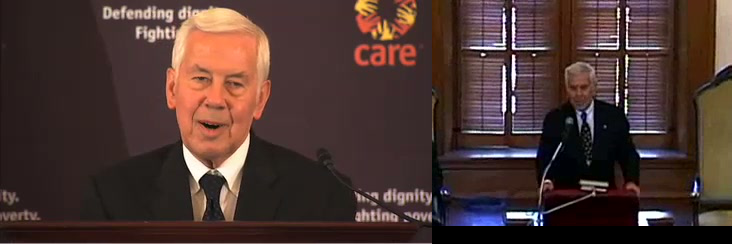

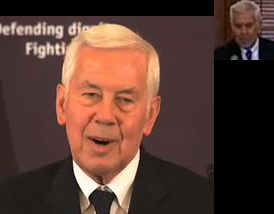

Left : Name = Richard_Lugar, Gender = M, Skin Tone = #9D7A54
Right : Name = Richard_Lugar, Gender = M, Skin Tone = #6F503C
Same = True


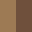

In [90]:
# Select a random triplet among the "same" examples and print it along with some information
same_triplets = df[df["label"] == 1]
print_example(same_triplets.sample(1).to_dict(orient="records")[0])

{'x_1': 230, 'y_1': 126, 'width_1': 80, 'height_1': 80, 'filepath_1': '/dataset/YouTubeFaces/frame_images_DB/Daniel_Scioli/1/1.52.jpg', 'subject_name_1': 'Daniel_Scioli', 'x_2': 257, 'y_2': 60, 'width_2': 57, 'height_2': 57, 'filepath_2': '/dataset/YouTubeFaces/frame_images_DB/Renato_Soru/4/4.127.jpg', 'subject_name_2': 'Renato_Soru', 'label': 0, 'gender_1': 'M', 'gender_2': 'M', 'skin_tone_1': '#6F503C', 'skin_tone_2': '#6F503C'}


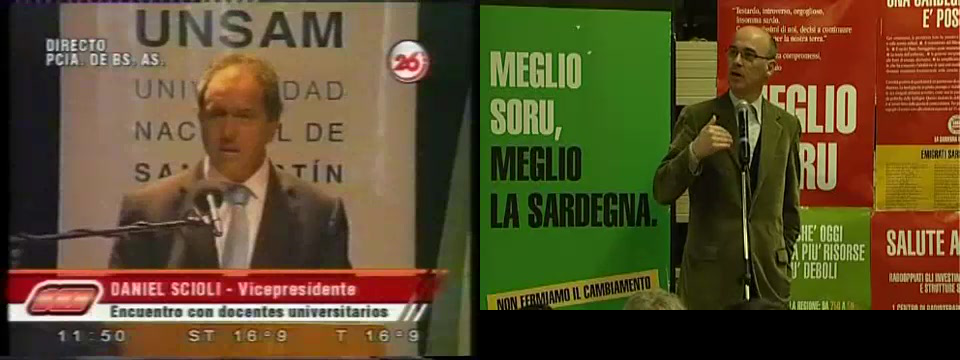

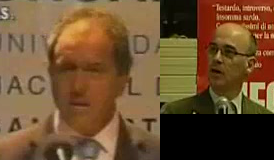

Left : Name = Daniel_Scioli, Gender = M, Skin Tone = #6F503C
Right : Name = Renato_Soru, Gender = M, Skin Tone = #6F503C
Same = False


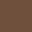

In [91]:
# Select a random triplet among the "different" examples and print it along with some information
different_triplets = df[df["label"] == 0]
print_example(different_triplets.sample(1).to_dict(orient="records")[0])

# Data Exploration

### How many samples are there ?

In [92]:
print(f"Number of samples = {len(df)}")

Number of samples = 5000


### Distribution of samples `Same` vs. `Different`

Number of samples of class 'Same' = 2500
Number of samples of class 'Different' = 2500


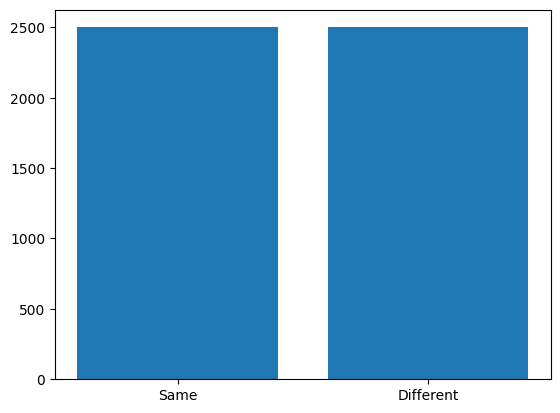

In [93]:
nb_same = len(df[df["label"] == 1])
nb_different = len(df[df["label"] == 0])
print(f"Number of samples of class 'Same' = {nb_same}")
print(f"Number of samples of class 'Different' = {nb_different}")

plt.figure()
plt.bar(["Same", "Different"], [nb_same, nb_different])
plt.show()

The dataset is well balanced for the label `Same`/`Different`

### How many people are there in the dataset ?

In [94]:
df_1 = df[["subject_name_1", "gender_1", "skin_tone_1"]].rename(columns={"subject_name_1": "subject_name", "gender_1": "gender", "skin_tone_1": "skin_tone"})
df_2 = df[["subject_name_2", "gender_2", "skin_tone_2"]].rename(columns={"subject_name_2": "subject_name", "gender_2": "gender", "skin_tone_2": "skin_tone"})
new_df = pd.concat([df_1, df_2])

print(f"Number of subjects : {len(new_df['subject_name'].unique())}")

Number of subjects : 1447


There are less subjects than there samples. It means the subjects reused between samples.

### What is the distribution of men/women in the dataset ?

In [95]:
new_df["gender"].unique()

array(['F', 'M', nan], dtype=object)

Apparently, some subjects did not have any gender annotation.

Number of women : 454
Number of men : 991
Number of subjects without gender annotations : 2


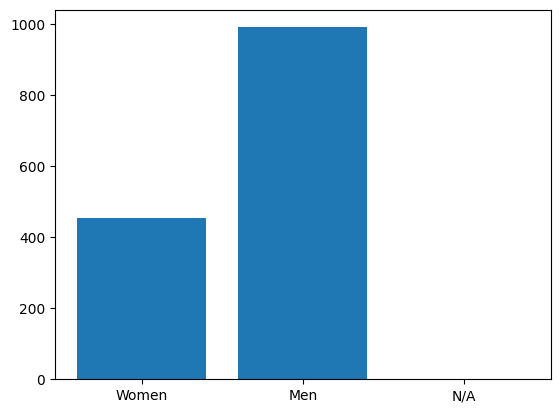

In [96]:
female_subjects = new_df.groupby("gender")["subject_name"].unique()["F"]
male_subjects = new_df.groupby("gender")["subject_name"].unique()["M"]
nan_subjects = new_df[(new_df["gender"] != 'F') & (new_df["gender"] != 'M')]["subject_name"].unique()
print(f"Number of women : {len(female_subjects)}")
print(f"Number of men : {len(male_subjects)}")
print(f"Number of subjects without gender annotations : {len(nan_subjects)}")

plt.figure()
plt.bar(["Women", "Men", "N/A"], [len(female_subjects), len(male_subjects), len(nan_subjects)])
plt.show()

There is a strong imbalance in the gender distribution, at least in the number of subjects considered.

### How are men and women distributed in the samples ?

In [97]:
def compute_number_women_in_triplet(triplet):
    if triplet["gender_1"] == triplet["gender_2"] == "F":
        return 2
    elif triplet["gender_1"] == triplet["gender_2"]:
        return 0
    else:
        return 1

df["nb_women"] = df.apply(compute_number_women_in_triplet, axis="columns")

#### a) Overall

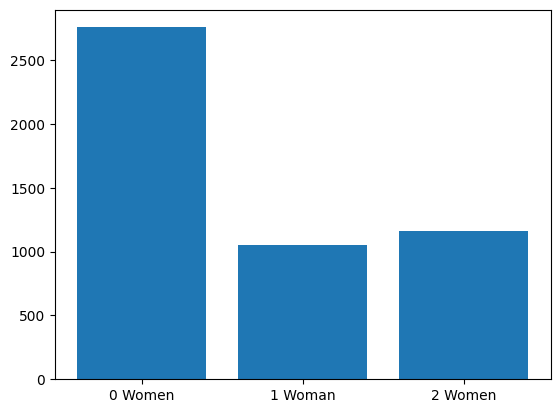

In [98]:
plt.figure()
plt.bar(["0 Women", "1 Woman", "2 Women"], list(df.dropna().groupby("nb_women")["x_1"].count()))
plt.show()

#### b) In the `same` samples

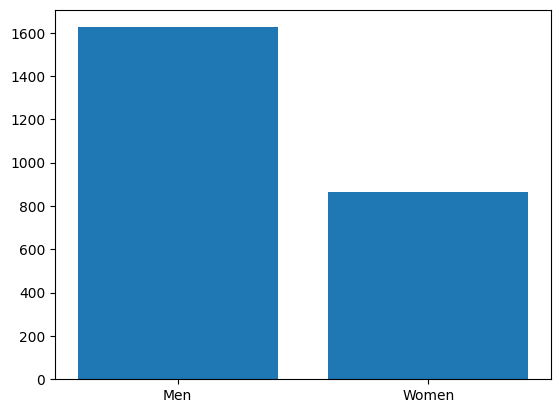

In [99]:
plt.figure()
plt.bar(["Men", "Women"], list(df[df["label"]==1].dropna().groupby("nb_women")["x_1"].count()))
plt.show()

#### c) In the `different` samples

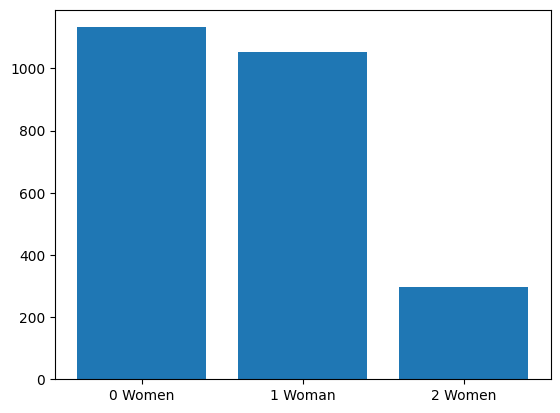

In [100]:
plt.figure()
plt.bar(["0 Women", "1 Woman", "2 Women"], list(df[df["label"]==0].dropna().groupby("nb_women")["x_1"].count()))
plt.show()

The same imbalanced ratio of Men/Women can be found across the dataset.

# Data selection

#### Possible methods

The gender imbalance in the dataset needs to be taken into account where selecting data for the `train`/`test` split. So two possible solutions are :
- Adding exterior data to mitigate the imbalance :
    - Advantage(s) :
        - Add more variety to the dataset
    - Inconvenient(s) :
        - Expensive time-wise : need to find new videos, annotate them, etc.
- Augment the available data (eg: mix samples to get unseen pairs)
    - Advantage(s) :
        - Quick to implement for the class `different`
    - Inconvenient(s) :
        - The imbalance on the `same` pairs cannot be fixed without adding new women or new videos featuring the women already present in the dataset.
- Leave out some of the data about men :
    - Advantage(s) :
        - Quickest to implement
        - Does not need new data
    - Inconvenient(s) :
        - We end up with less data than we had at the beginning. -> Will there be enough for our needs ?
     
#### Method chosen 
     
Due to time constraints, we choose the last option : leaving out some of the data about men.

We have two cases, and five sub-cases :
- 1. The compared images/videos feature the same subject :
    - 1.a The subject is a man
    - 1.b The subject is a woman
- 2. The compared images/videos feature different subjects :
    - 2.a Both subjects are men
    - 2.b Both subjects are women
    - 2.c The subjects have a different gender
 
To have a balance dataset, we first need make sure that there are the same numbers of examples in both cases. Then, each sub-case must be in balance with its related sub cases

In [101]:
# Find the number of examples in each possible case
df_same_women = df[(df["label"]==1) & (df["gender_1"]=='F')]
df_same_men = df[(df["label"]==1) & (df["gender_1"]=='M')]
df_different_0_women = df[(df["label"]==0) & (df["nb_women"]==0)]
df_different_1_woman = df[(df["label"]==0) & (df["nb_women"]==1)]
df_different_2_women = df[(df["label"]==0) & (df["nb_women"]==2)]

nb_case_1 = len(df_same_women) + len(df_same_men)
nb_case_2 = len(df_different_0_women) + len(df_different_1_woman) + len(df_different_2_women)

print(f"Number of examples in case 1 = {nb_case_1}")
print(f"Number of examples in case 1.a = {len(df_same_men)}")
print(f"Number of examples in case 1.b = {len(df_same_women)}")
print(f"Number of examples in case 2 = {nb_case_2}")
print(f"Number of examples in case 2.a = {len(df_different_0_women)}")
print(f"Number of examples in case 2.b = {len(df_different_2_women)}")
print(f"Number of examples in case 2.c = {len(df_different_1_woman)}")

Number of examples in case 1 = 2491
Number of examples in case 1.a = 1625
Number of examples in case 1.b = 866
Number of examples in case 2 = 2500
Number of examples in case 2.a = 1132
Number of examples in case 2.b = 298
Number of examples in case 2.c = 1070


The sub-case with the lowest amount of examples is `sub-Case 2.b` when the 2 images are from different women. There are only 298 examples for that case !
To have a well-balanced dataset for `Case 2`, each `sub-Case 2.x` needs to have 298 samples, for a total of 298x3 = 894 samples.
This means that, to have a good balance between `Case 1` and `Case 2`, `Case 1` needs to have 298 examples also.
Finally to have good balance between `subCase 2.a` and `2.b`, each needs to have 624/2 = 447 examples.

NB. `Sub-Case 1.b` has only 866 examples instead of the required 894, so there will still have a slight imbalance.

In [108]:
# Select data for each case
nb_to_sample_1 = 447
nb_to_sample_2 = 298

df_selected = pd.concat([
    df_same_women.sample(nb_to_sample_1), df_same_men.sample(nb_to_sample_1), 
    df_different_0_women.sample(nb_to_sample_2), df_different_1_woman.sample(nb_to_sample_2), 
    df_different_2_women.sample(nb_to_sample_2)])
print(len(df_selected))

1788


The number of examples has been dramatically reduced : from 5000 to ~1800 !
Let's make sure we verify the criteria we wanted.

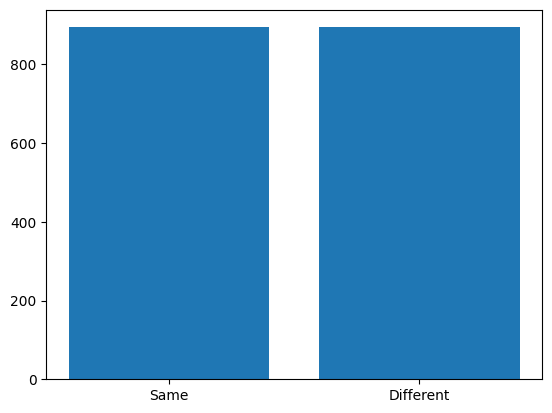

In [109]:
# Distribution of the `same` / `different` label
plt.figure()
plt.bar(["Same", "Different"], list(df_selected.groupby("label")["x_1"].count()))
plt.show()

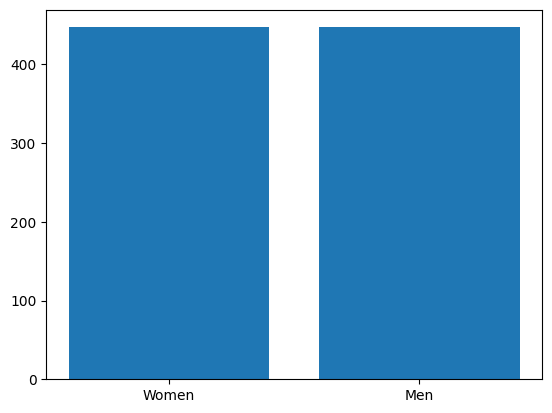

In [120]:
# Distribution of the `gender` label in case 1
plt.figure()
plt.bar(["Women", "Men"], list(df_selected[df_selected["label"]==1].groupby("gender_1")["x_1"].count()))
plt.show()

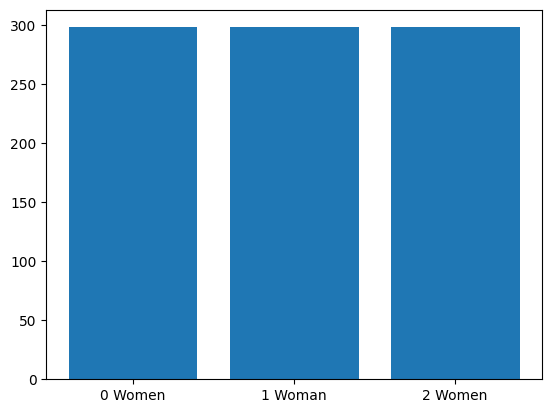

In [121]:
# Distribution of the `nb_women` label in case 2
plt.figure()
plt.bar(["0 Women", "1 Woman", "2 Women"], list(df_selected[df_selected["label"]==0].groupby("nb_women")["x_1"].count()))
plt.show()

# Split the the chosen data and save them

For a machine learning problem, we need to split the dataset into 3 subsets :
- training subset
- developpement subset
- evaluation/test subset

In this problem, we split to an 80/10/10 ratio.

Let's save those subsets in CSV files :

In [124]:
df_selected_tmp = df_selected.copy()

# Select test set
df_test = df_selected_tmp.sample(frac=0.1)
df_selected_tmp = df_selected_tmp.drop(df_test.index)

# Select test set, the leftovers are the train set
df_dev = df_selected_tmp.sample(frac=0.1)
df_train = df_selected_tmp.drop(df_dev.index)

df_selected.to_csv("/output/selected_metadata.csv", index=None)
df_train.to_csv("/output/train_metadata.csv", index=None)
df_test.to_csv("/output/test_metadata.csv", index=None)
df_dev.to_csv("/output/dev_metadata.csv", index=None)